In [1]:
'''
カラム	ヘッダ名称	データ型	説明
0	index	int	インデックスとして使用
1	Pregnancies	int	妊娠した回数
2	Glucose	int	経口ブドウ糖負荷試験における2時間の血漿ブドウ糖濃度
3	BloodPressure	int	拡張期血圧
4	SkinThickness	int	皮膚のひだの厚さ
5	Insulin	int	血清インスリン
6	BMI	float	BMI
7	Age	int	年齢
8	DiabetesPedigreeFunction	float	糖尿病血統
9	Outcome	int	糖尿病であるか（糖尿病の場合1、でない場合0）
'''

'\nカラム\tヘッダ名称\tデータ型\t説明\n0\tindex\tint\tインデックスとして使用\n1\tPregnancies\tint\t妊娠した回数\n2\tGlucose\tint\t経口ブドウ糖負荷試験における2時間の血漿ブドウ糖濃度\n3\tBloodPressure\tint\t拡張期血圧\n4\tSkinThickness\tint\t皮膚のひだの厚さ\n5\tInsulin\tint\t血清インスリン\n6\tBMI\tfloat\tBMI\n7\tAge\tint\t年齢\n8\tDiabetesPedigreeFunction\tfloat\t糖尿病血統\n9\tOutcome\tint\t糖尿病であるか（糖尿病の場合1、でない場合0）\n'

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from matplotlib import pyplot as plt

train = pd.read_csv('/Users/markun/SIGNATE/train.csv')
test = pd.read_csv('/Users/markun/SIGNATE/test.csv')

train

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1
...,...,...,...,...,...,...,...,...,...,...
2995,4931,4,88,74,17,0,33.848723,0.171073,23,0
2996,3264,0,144,88,0,0,26.846832,0.259957,21,1
2997,1653,6,117,96,36,0,28.101646,0.716126,22,1
2998,2607,2,113,74,0,0,33.079021,0.266179,38,1


In [4]:
train_x = train[train['Outcome'] == 1]

In [5]:
train_x

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
4,3644,5,107,78,44,284,52.935068,0.284959,45,1
6,2203,2,138,86,30,0,32.804714,0.269270,27,1
7,565,1,123,52,0,0,39.865034,0.714738,45,1
10,4818,9,125,76,28,0,39.813548,0.163193,45,1
...,...,...,...,...,...,...,...,...,...,...
2990,705,7,105,60,0,0,33.484555,0.447002,37,1
2992,4373,2,129,74,0,0,33.755248,0.750954,22,1
2996,3264,0,144,88,0,0,26.846832,0.259957,21,1
2997,1653,6,117,96,36,0,28.101646,0.716126,22,1


In [6]:
train_x2 = train[train['Outcome'] == 0]

In [7]:
train_x2

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
5,3323,5,84,64,0,0,33.459536,0.505127,26,0
8,1386,1,138,76,30,0,39.660380,0.503107,23,0
...,...,...,...,...,...,...,...,...,...,...
2991,3468,8,110,84,0,0,38.003580,0.203175,22,0
2993,1033,5,91,68,0,0,39.057689,0.215700,22,0
2994,4859,6,126,88,41,0,39.255880,0.484134,30,0
2995,4931,4,88,74,17,0,33.848723,0.171073,23,0


In [8]:
train_x2.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.0
mean,2484.636443,3.220762,112.976785,68.273763,11.155059,9.657030,34.225907,0.385228,27.669733,0.0
std,1445.319168,2.835447,19.806578,16.344531,13.941959,39.963077,7.027445,0.256678,7.813643,0.0
min,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000775,0.145844,21.000000,0.0
25%,1216.500000,1.000000,100.000000,64.000000,0.000000,0.000000,28.338544,0.229624,22.000000,0.0
50%,2441.000000,2.000000,111.000000,70.000000,0.000000,0.000000,33.600215,0.264458,25.000000,0.0
75%,3748.000000,5.000000,124.000000,78.000000,22.000000,0.000000,39.371439,0.498923,29.000000,0.0
max,4999.000000,13.000000,194.000000,110.000000,48.000000,440.000000,52.938394,2.302072,67.000000,0.0


In [9]:
train_x.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.0
mean,2519.482566,4.627615,116.143654,70.239888,11.192469,18.051604,38.561328,0.449026,32.951185,1.0
std,1453.941533,3.372907,23.856186,16.216015,15.593001,57.984937,8.257000,0.320793,9.196891,0.0
min,6.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.001161,0.152520,21.000000,1.0
25%,1233.000000,2.000000,100.000000,65.000000,0.000000,0.000000,33.526877,0.237849,25.000000,1.0
50%,2546.000000,5.000000,115.000000,72.000000,0.000000,0.000000,39.197511,0.280055,31.000000,1.0
75%,3768.000000,7.000000,125.000000,80.000000,30.000000,0.000000,40.274320,0.543846,41.000000,1.0
max,4998.000000,13.000000,196.000000,110.000000,49.000000,579.000000,53.400629,2.211398,61.000000,1.0


・妊娠した回数の平均が大きい
・インスリンの値が大きい
・平均年齢が高い

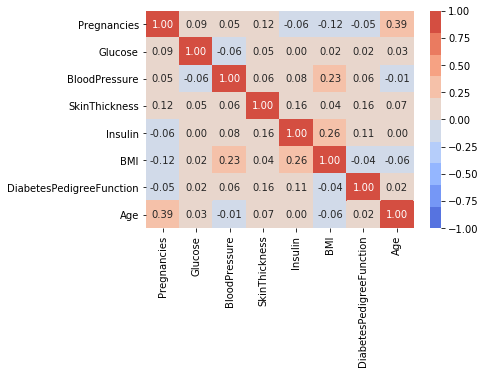

In [10]:
import seaborn as sns
columns = train_x[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']].corr()
sns.heatmap(columns, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

「正の相関」
・年齢と妊娠回数
・BMIと血圧
・BMIとインスリン

「負の相関」
・BMIと妊娠回数
・インスリンと妊娠回数
・糖尿病家系と妊娠回数

In [11]:
train_x = train.drop(['Outcome','index'], axis = 1)
train_y = train['Outcome']

In [ ]:
test_x = test.copy()

In [12]:
train_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,125,74,0,0,28.536910,0.444902,45
1,4,109,80,0,0,28.047673,0.238243,22
2,4,88,78,39,0,52.371341,0.279471,26
3,9,125,74,0,0,40.062688,0.203922,45
4,5,107,78,44,284,52.935068,0.284959,45
...,...,...,...,...,...,...,...,...
2995,4,88,74,17,0,33.848723,0.171073,23
2996,0,144,88,0,0,26.846832,0.259957,21
2997,6,117,96,36,0,28.101646,0.716126,22
2998,2,113,74,0,0,33.079021,0.266179,38


In [ ]:
dtrain = xgb.DMatrix(tr_x, label = tr_y)
dvalid = xgb.DMatrix(va_x, label = va_y)
dtest = xgb.Dmatrix(test_x)

params = {'objective':'binary:logstic','silent':1,'random_state':71}
num_round = 50